In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("vehicle-1.csv")

In [3]:
data.shape

(846, 19)

In [4]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
data.rename(columns={ data.columns[-1]: "Target" }, inplace = True)
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio Target  
0             187.0            197    van  
1             189.0            199    van  
2             188.0            196    car  
3             199.0            207    van  
4             180.0            183    bus

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
data['Target'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [8]:
num_data = data.drop(['Target'], axis=1)
np.isnan(num_data).sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

#### There are very few entries with missing data. So these entries will be droped.

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
num_data2 = data.drop(['Target'], axis=1)
np.isnan(num_data2).sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [11]:
data.shape

(813, 19)

In [12]:
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

#### The data is fairly distributed. Few columns have some outliers. None of the colunm have unreasonable max or min value.

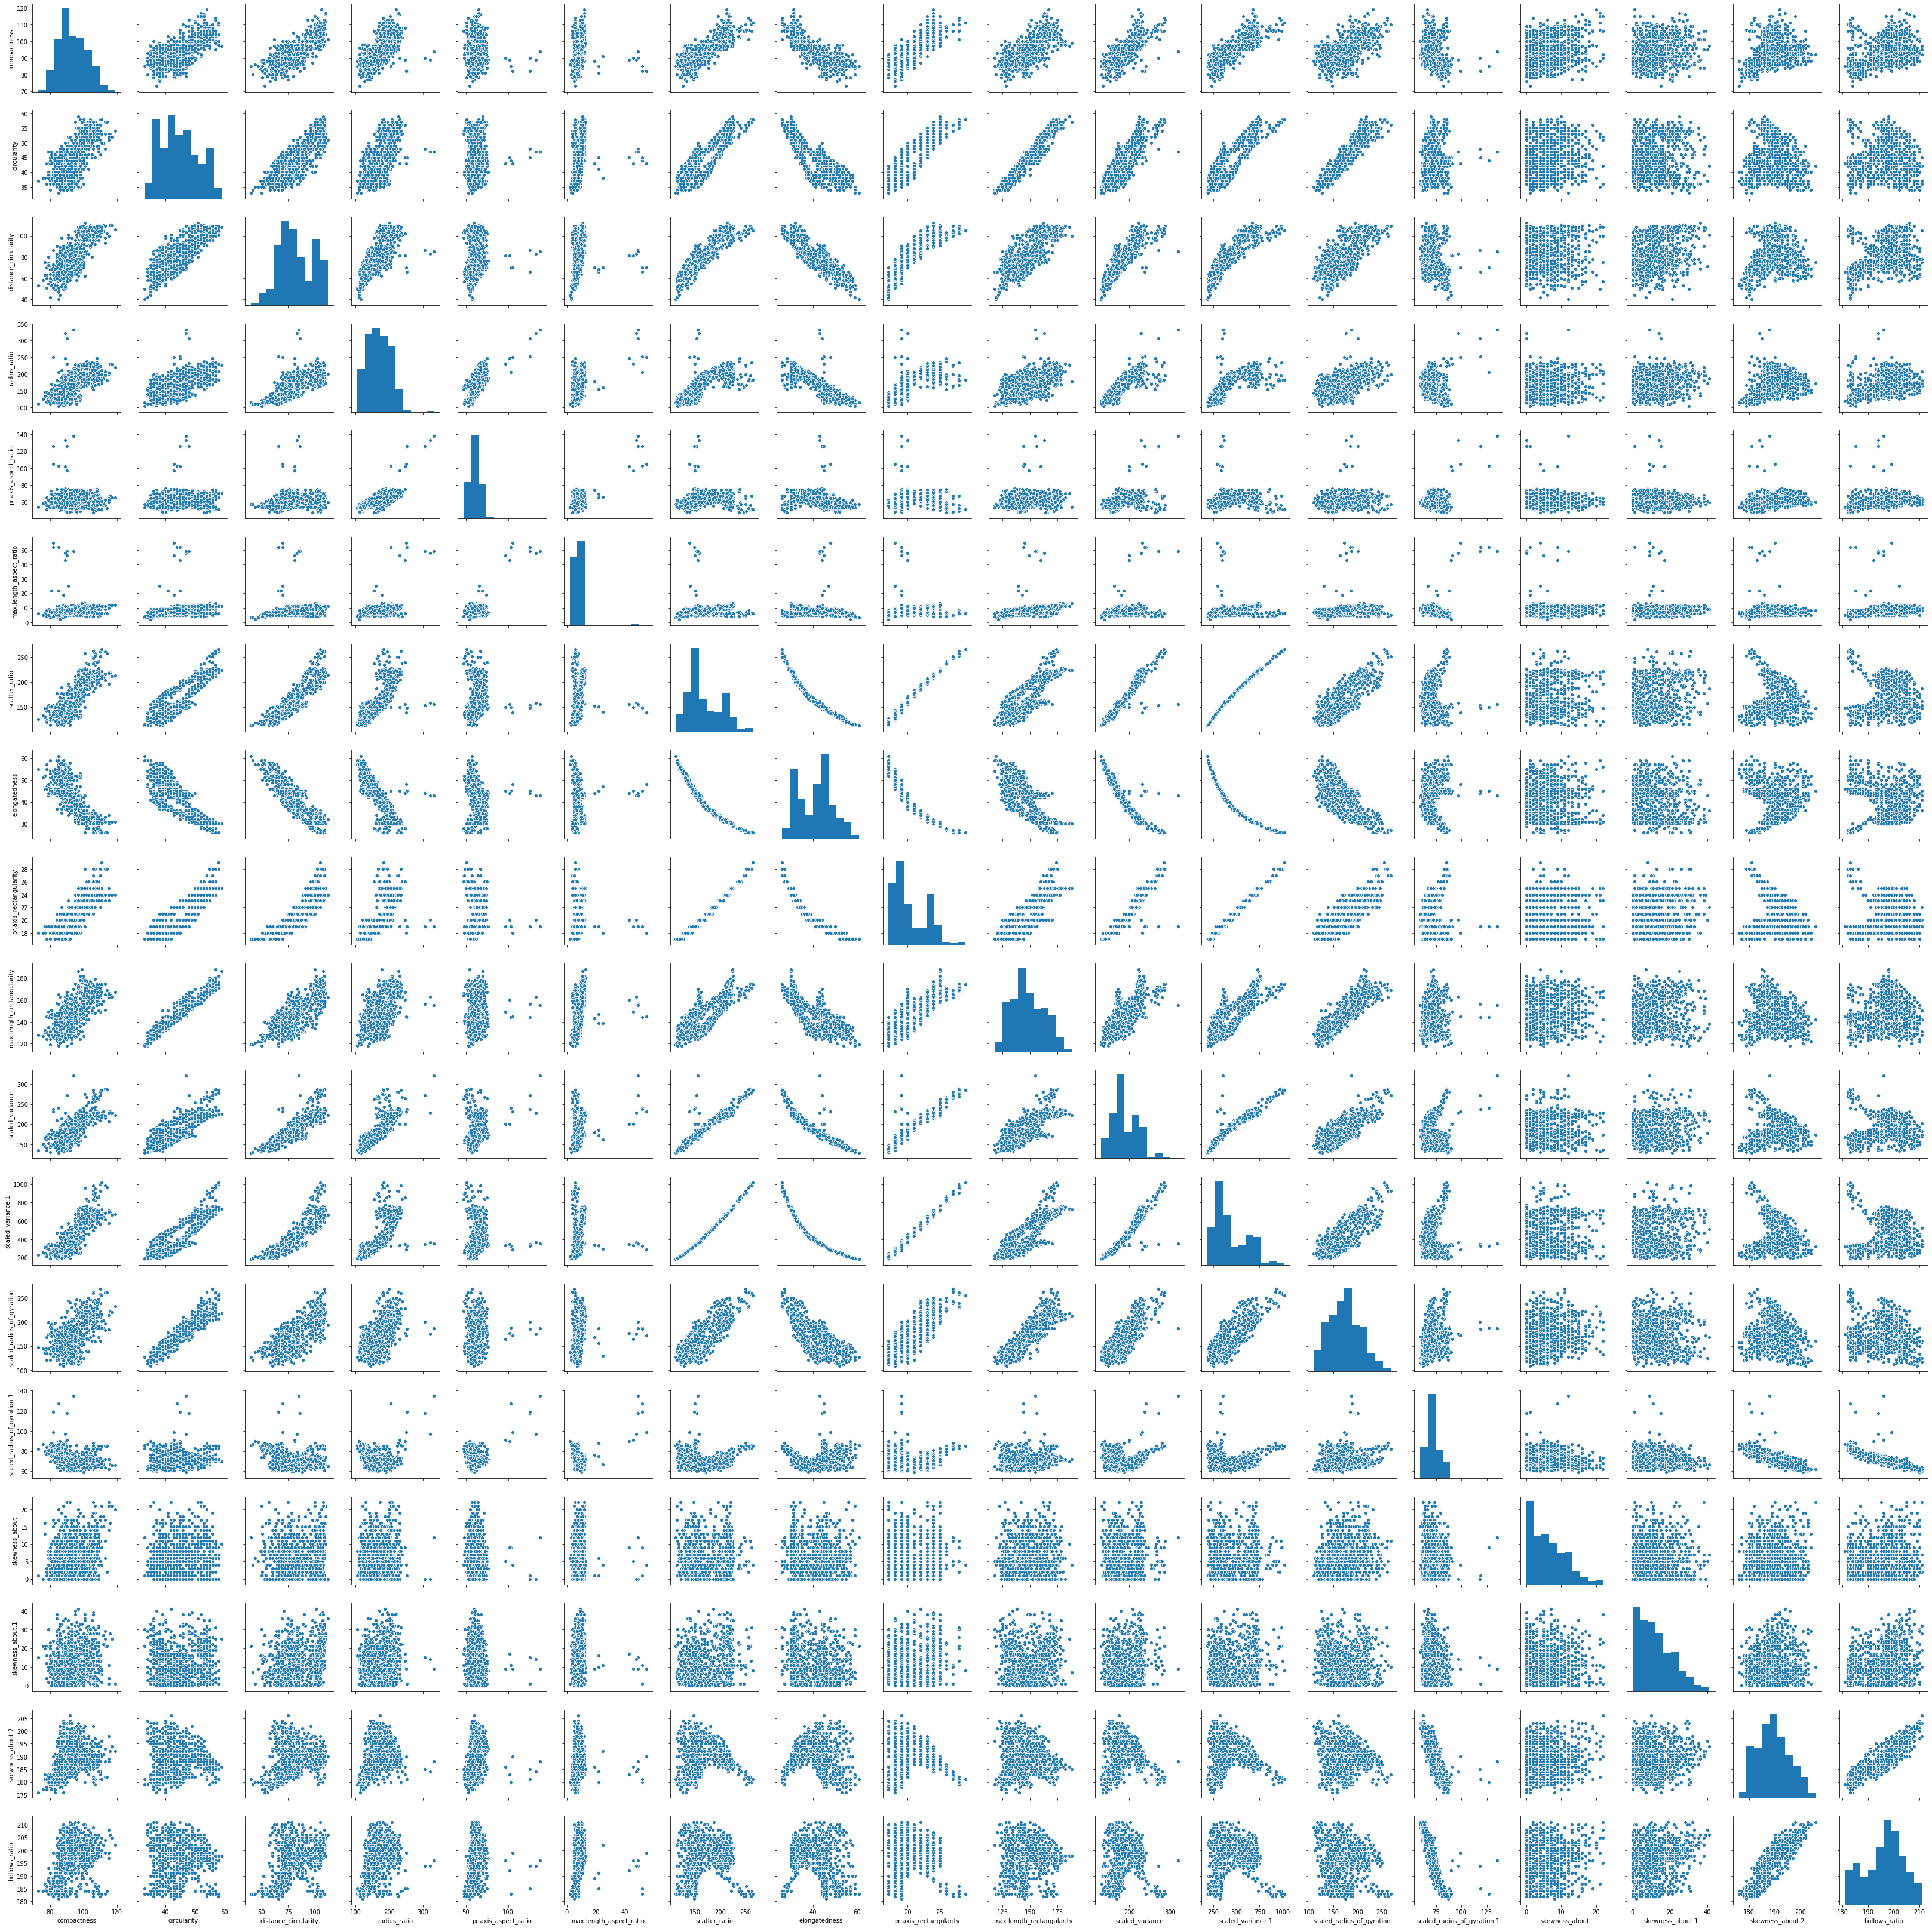

In [13]:
sns.pairplot(data)

#### There are a few attributes with very high correlation. If it is high enough, one of the correlated attribute can be droped. The histogram of each numerical attributes are also displayed.

#### Also we can look at the histograms along the diagonal for all numeric data. Some of them have very high skewness. 

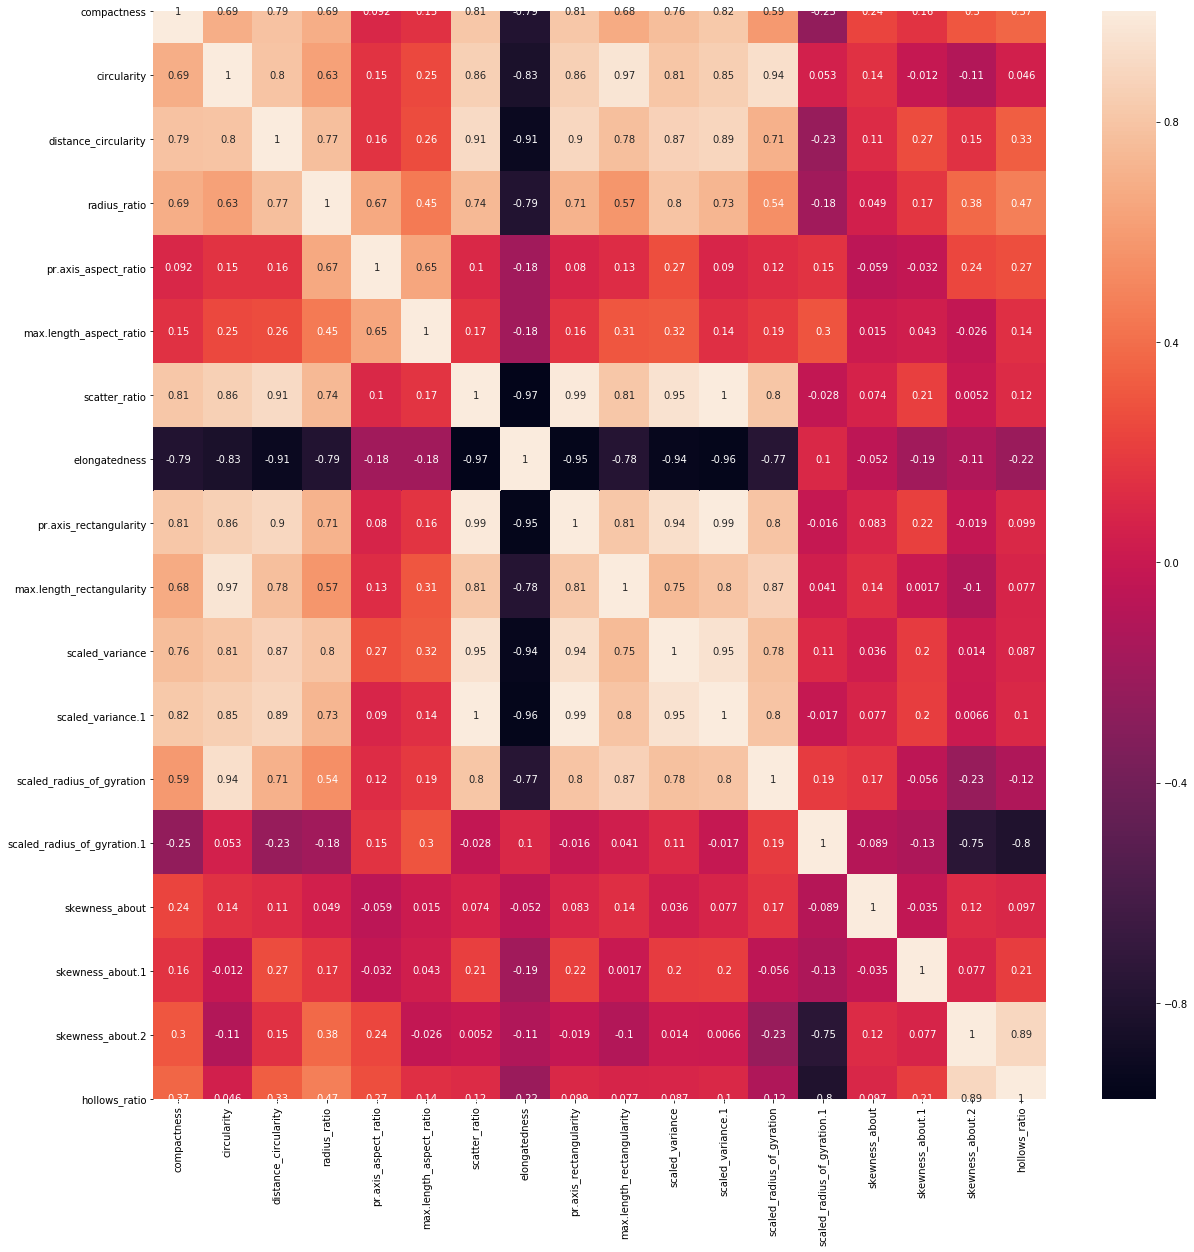

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(num_data.corr(), annot=True)

#### There are a lot of columns with high correlation. The columns that has correlation of 0.99 and above will be droped

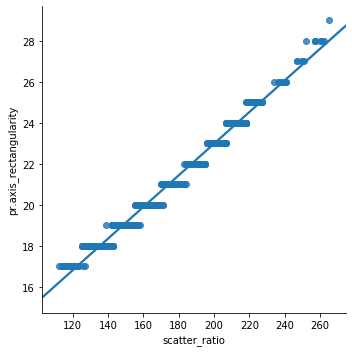

In [15]:
sns.lmplot(data= data, x='scatter_ratio', y='pr.axis_rectangularity')

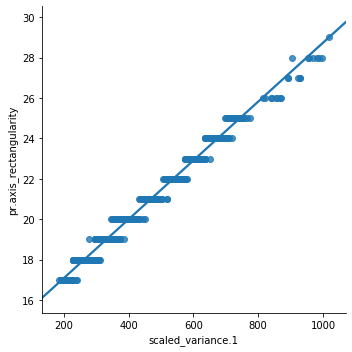

In [16]:
sns.lmplot(data= data, x='scaled_variance.1', y='pr.axis_rectangularity')

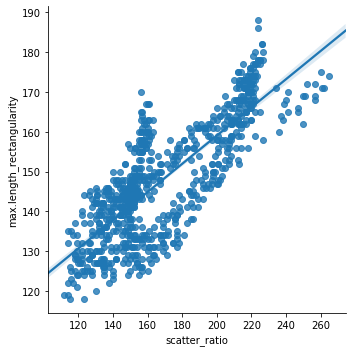

In [17]:
sns.lmplot(data= data, x='scatter_ratio', y='max.length_rectangularity')

#### pr.axis_rectangularity column will be droped as it does not contain continious data and scaled_variance.1 will be droped.

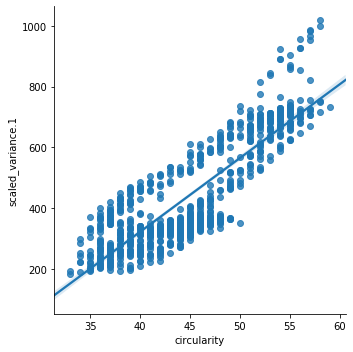

In [18]:
sns.lmplot(data= data, x='circularity', y='scaled_variance.1')

#### Either of these columns are not dropped as their correlation is below 0.99.

In [19]:
data.drop(['pr.axis_rectangularity','scaled_variance.1'], axis=1, inplace=True)

In [20]:
data.shape

(813, 17)

In [21]:
data['Target'] = pd.Categorical(data['Target'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 17 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio                  813 non-null int64
Target                         813 non-null category
dtypes: category(1

In [23]:
num_data = data.drop(['Target'], axis=1)

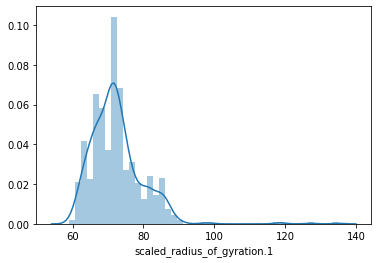

In [24]:
sns.distplot(data['scaled_radius_of_gyration.1'])

#### This is positively skewed and will have extreme outliers

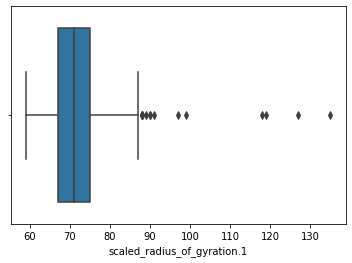

In [25]:
sns.boxplot(data['scaled_radius_of_gyration.1'])

#### There are very few outliers.

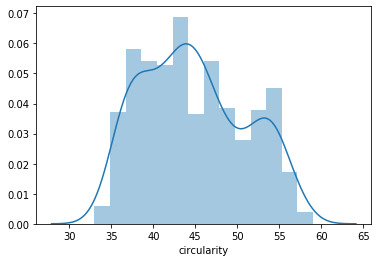

In [26]:
sns.distplot(data['circularity'])

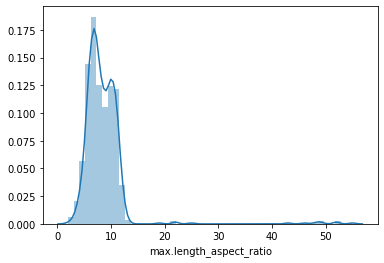

In [27]:
sns.distplot(data['max.length_aspect_ratio'])

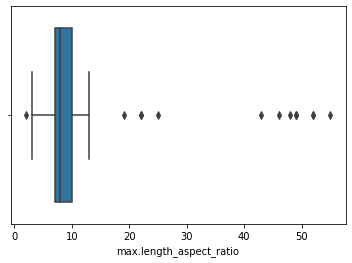

In [28]:
sns.boxplot(data['max.length_aspect_ratio'])

#### Again we can see few outliers. Some of them are extreme.

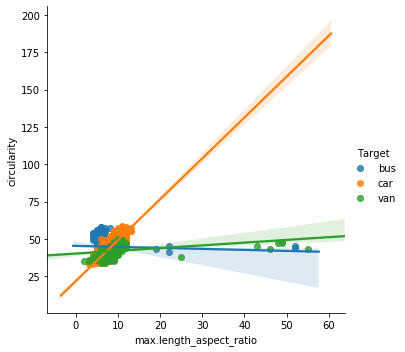

In [29]:
sns.lmplot(data = data, x = 'max.length_aspect_ratio', y = 'circularity', hue="Target")

#### It can be infered by the slope of the line for car that as circularity incerases max.length_aspect_ratio increases equally. And circularity of bus and vans do not go very high.

#### We will not be tampering with the outliers as they are valid data and adds variablity to the models.

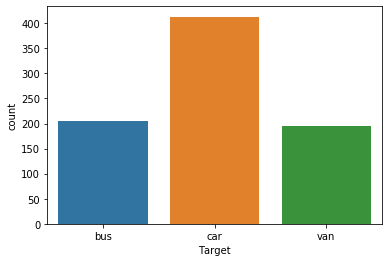

In [30]:
sns.countplot(data['Target'])

#### Entries for type car are significantly higher than other two. Model will be slightly biased. 

### Train-test split:

In [31]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [32]:
num_data_z = data.drop(['Target'], axis=1)
data_z = num_data_z.apply(zscore)

X = data_z
Y = data.Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

### SVM:

In [33]:
from sklearn import svm

In [34]:
clf = svm.SVC(gamma=0.055, C=5)

In [35]:
clf.fit(X_train , Y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.055, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
Y_pred = clf.predict(X_test)

In [37]:
clf.score(X_train,Y_train)

0.9912126537785588

In [38]:
clf.score(X_test,Y_test)

0.9631147540983607

In [39]:
data_svm = data
data_grp = clf.predict(X)
data_svm["GROUP"] = data_grp
data_svm.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  max.length_rectangularity  scaled_variance  \
0           42.0                        159            176.0   
1           45.0                        143            170.0   
2           32.0                        158            223.0   
3           46.0                        143            160.0   
4           45.0                        144            241.0   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
4                      188.0                        127.0             9.0   

   skewness_about.1  skewness_about.2  hollows_ratio Target GROUP  
0              16.0             187.0            197    van   van  
1              14.0             189.0            199    van   van  
2               9.0             188.0            196    car   car  
3              10.0             199.0            207    van   van  
4              11.0             180.0            183    bus   bus

### K-fold cross validation on SVM model

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = 10

kfold = KFold(n_splits = folds, random_state=5)

In [41]:
model = svm.SVC(gamma=0.055, C=5)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.97560976 0.97560976 0.96341463 0.98765432 1.         0.97530864
 0.97530864 1.         0.96296296 0.98765432]
Accuracy: 98.035% (1.251%)


#### K = 10. Average accuracy is 98.035% with a standard deviation of 1.251.

### PCA:

In [42]:
from sklearn.decomposition import PCA
data_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  max.length_rectangularity  scaled_variance  \
0       0.129648                   0.766312        -0.397397   
1       0.514333                  -0.337462        -0.590034   
2      -1.152637                   0.697326         1.111591   
3       0.642562                  -0.337462        -0.911095   
4       0.514333                  -0.268476         1.689501   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                   0.301676                    -0.321192       -0.071523   
1                  -0.502972                    -0.053505        0.538425   
2                   1.415804                     0.080339        1.555006   
3                  -1.462359                    -1.258099       -0.071523   
4                   0.425468                     7.307905        0.538425   

   skewness_about.1  skewness_about.2  hollows_ratio  
0          0.371287         -0.321809       0.171837  
1          0.147109          0.003400       0.442318  
2         -0.413338         -0.159204       0.036596  
3         -0.301249          1.629444       1.524243  
4         -0.189159         -1.460039      -1.721531

In [43]:
data_z.shape
n_eigen = data_z.shape[1]

In [44]:
pca = PCA(n_components=n_eigen)
pca.fit(data_z)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
print('Eigen vectors:')
pca.explained_variance_

Eigen vectors:


array([7.62967075, 2.96843825, 1.85884136, 1.14443843, 0.92868636,
       0.51185488, 0.35126605, 0.22070832, 0.15513907, 0.08799532,
       0.05569055, 0.04191636, 0.02625276, 0.01630296, 0.01313007,
       0.00937294])

In [46]:
pca.components_

array([[-3.04635113e-01, -3.26842145e-01, -3.38646770e-01,
        -3.08102067e-01, -1.10752216e-01, -1.24836082e-01,
        -3.45146731e-01,  3.44807205e-01, -3.14055049e-01,
        -3.40261597e-01, -2.99076090e-01,  3.49263690e-02,
        -4.86419114e-02, -6.62747219e-02, -4.80281307e-02,
        -1.03705372e-01],
       [-1.13534281e-01,  1.54701879e-01, -5.49185874e-02,
        -1.53584719e-01, -7.63479417e-02,  5.31002246e-02,
         5.95997826e-02, -1.30940110e-03,  1.40513247e-01,
         8.08304345e-02,  2.29285015e-01,  4.99508987e-01,
        -5.24877638e-02, -1.23258127e-01, -5.42603375e-01,
        -5.32584413e-01],
       [-1.43741264e-01, -8.78733481e-02, -8.61438406e-02,
         2.66831024e-01,  6.47822788e-01,  5.77138779e-01,
        -1.28753873e-01,  8.55960739e-02, -7.51515252e-02,
         3.27413740e-02, -8.94067121e-02,  2.68453512e-01,
        -1.38959601e-01, -6.12745819e-02,  4.74946887e-02,
         6.50284275e-02],
       [ 5.57255648e-02,  1.52342577e

In [47]:
pca.explained_variance_ratio_

array([0.47626789, 0.18529919, 0.11603468, 0.07143942, 0.0579715 ,
       0.03195158, 0.02192712, 0.0137773 , 0.00968427, 0.00549294,
       0.00347638, 0.00261655, 0.00163878, 0.00101768, 0.00081962,
       0.00058509])

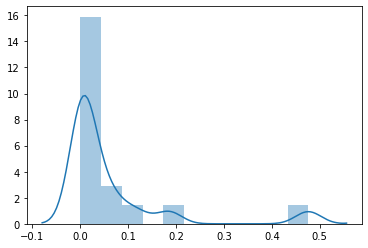

In [48]:
sns.distplot(pca.explained_variance_ratio_)

<BarContainer object of 16 artists>

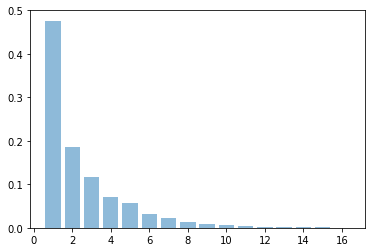

In [49]:
plt.bar(list(range(1,17)),pca.explained_variance_ratio_,alpha=0.5, align='center')

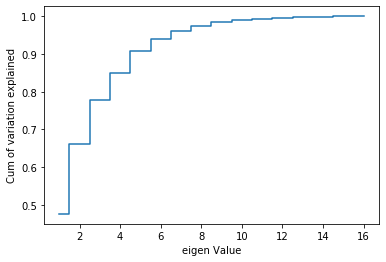

In [50]:
plt.step(list(range(1,17)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Now 7 dimensions seems very reasonable. With 7 variables we can explain over 95% of the variation in the original data.

In [51]:
pca6 = PCA(n_components=7)
pca6.fit(data_z)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(data_z)

[[-3.04635113e-01 -3.26842145e-01 -3.38646770e-01 -3.08102067e-01
  -1.10752216e-01 -1.24836082e-01 -3.45146731e-01  3.44807205e-01
  -3.14055049e-01 -3.40261597e-01 -2.99076090e-01  3.49263690e-02
  -4.86419114e-02 -6.62747219e-02 -4.80281307e-02 -1.03705372e-01]
 [-1.13534281e-01  1.54701879e-01 -5.49185874e-02 -1.53584719e-01
  -7.63479417e-02  5.31002246e-02  5.95997826e-02 -1.30940110e-03
   1.40513247e-01  8.08304345e-02  2.29285015e-01  4.99508987e-01
  -5.24877638e-02 -1.23258127e-01 -5.42603375e-01 -5.32584413e-01]
 [-1.43741264e-01 -8.78733481e-02 -8.61438406e-02  2.66831024e-01
   6.47822788e-01  5.77138779e-01 -1.28753873e-01  8.55960739e-02
  -7.51515252e-02  3.27413740e-02 -8.94067121e-02  2.68453512e-01
  -1.38959601e-01 -6.12745819e-02  4.74946887e-02  6.50284275e-02]
 [ 5.57255648e-02  1.52342577e-01 -1.03285964e-01 -4.09579097e-02
   7.05775309e-02  5.24040031e-02 -1.24317986e-01  1.12350898e-01
   1.53145070e-01 -1.38023302e-01  1.68072298e-01 -5.71802392e-02
   5.98

In [52]:
Xpca6

array([[-0.61869791, -0.05073807,  0.83652276, ...,  0.06047976,
        -0.61801444, -0.8802528 ],
       [ 1.32696159, -0.44408178, -0.36979842, ...,  0.68346599,
        -0.53941407,  0.32148119],
       [-3.49679633,  0.35737684, -0.11775027, ...,  0.72896018,
         0.74117813,  0.0576295 ],
       ...,
       [-4.23277246,  0.15946101,  0.4249389 , ..., -1.35460388,
        -0.2866426 ,  0.52993025],
       [ 2.96340079, -1.1126122 , -0.14860125, ...,  0.02750874,
        -0.35091185, -0.23658196],
       [ 4.39673365,  0.17239532, -0.40784549, ..., -0.06286253,
        -0.33086505,  0.05044085]])

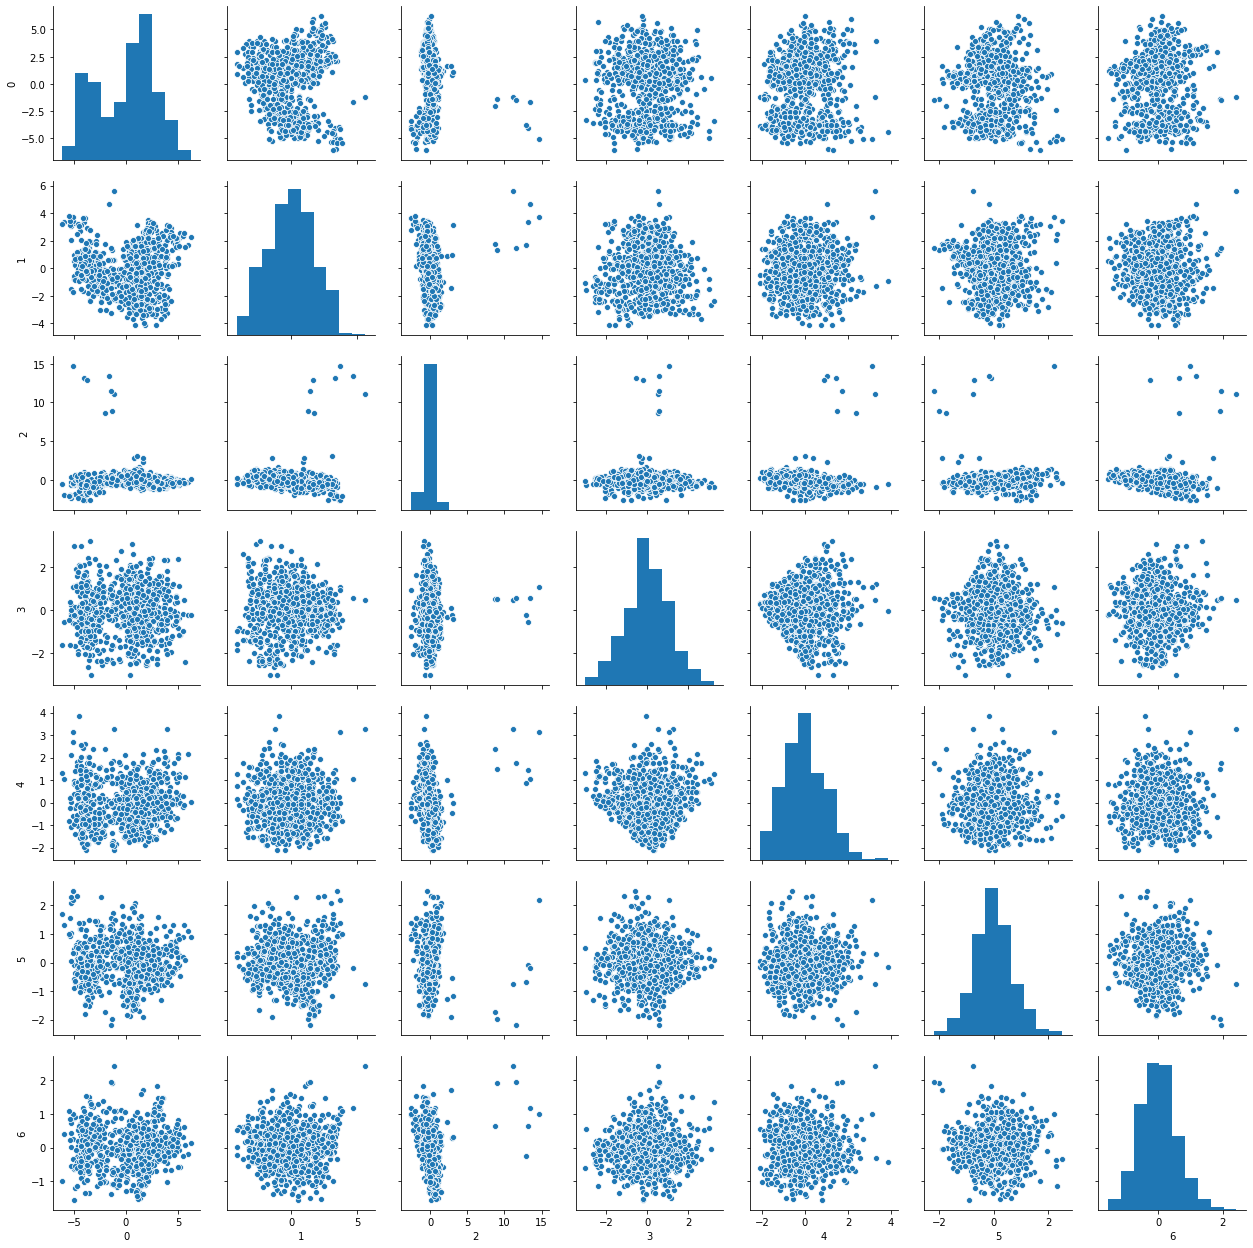

In [53]:
sns.pairplot(pd.DataFrame(Xpca6))

#### There is comparatively low correlation within each attributes

### Train-Test split

In [54]:
X2 = Xpca6
Y2 = data.Target
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state=1)

### SVM:

In [55]:
clf = svm.SVC(gamma=0.055, C=5)

In [56]:
clf.fit(X2_train , Y2_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.055, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
Y2_pred = clf.predict(X2_test)

In [58]:
clf.score(X2_train,Y2_train)

0.9543057996485061

In [59]:
clf.score(X2_test,Y2_test)

0.9098360655737705

### K-Fold:

In [60]:
folds = 10

kfold = KFold(n_splits = folds, random_state=5)

In [61]:
model = svm.SVC(gamma=0.055, C=5)
results = cross_val_score(model, X2, Y2, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.93902439 0.93902439 0.95121951 0.91358025 0.95061728 0.95061728
 0.86419753 0.91358025 0.96296296 0.91358025]
Accuracy: 92.984% (2.773%)


#### K = 10. Average accuracy is 92.984% with a standard deviation of 2.773.

#### The accuracy of SVM before the preforming PCA is higher. It is 96% before performing PCA and around 90% after.

#### Also, similar behavior can be seen in accuracy of K-Fold. In addition to it the standard deviation of the K-fold before preforming PCA is smaller.